In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv(r"C:\Users\kaust\OneDrive\Desktop\Australia Fire\fire_archive_M6_96619.csv")
df2=pd.read_csv(r"C:\Users\kaust\OneDrive\Desktop\Australia Fire\fire_archive_V1_96617.csv")

In [3]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [6]:
df1.shape

(36011, 15)

In [34]:
df1.dropna(inplace= True)
df1.shape

(36011, 15)

In [8]:
df1.satellite.unique()

array(['Terra', 'Aqua'], dtype=object)

In [42]:
dummies = pd.get_dummies(df1.satellite)
pd.concat([df1, dummies], axis=1).head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Aqua,Terra
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0,0,1
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0,0,1
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0,0,1
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0,0,1
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0,0,1


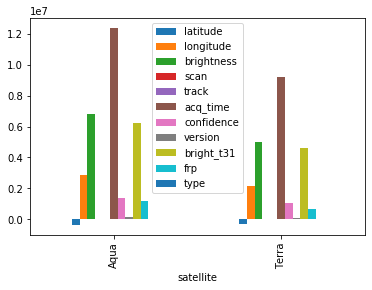

In [39]:
df1.groupby(['satellite']).sum().plot(kind='bar')

In [12]:
df1.instrument.unique()

array(['MODIS'], dtype=object)

In [14]:
df1.daynight.unique()

array(['D', 'N'], dtype=object)

In [15]:
df_2 = pd.get_dummies(df1.daynight)
pd.concat([df1, dummies2], axis=1).head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,D,N
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0,1,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0,1,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0,1,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0,1,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0,1,0


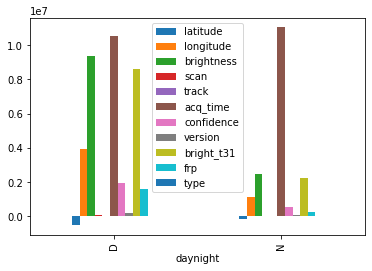

In [43]:
df1.groupby(['daynight']).sum().plot(kind='bar')

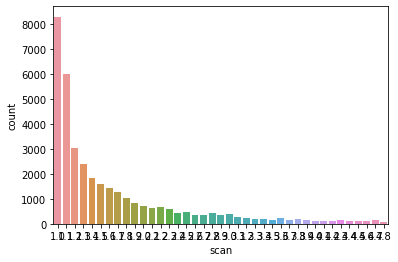

In [44]:
sns.countplot(x="scan", data=df1)

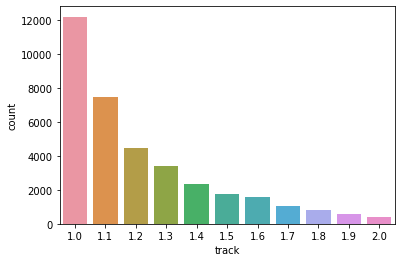

In [45]:
sns.countplot(x="track", data=df1)

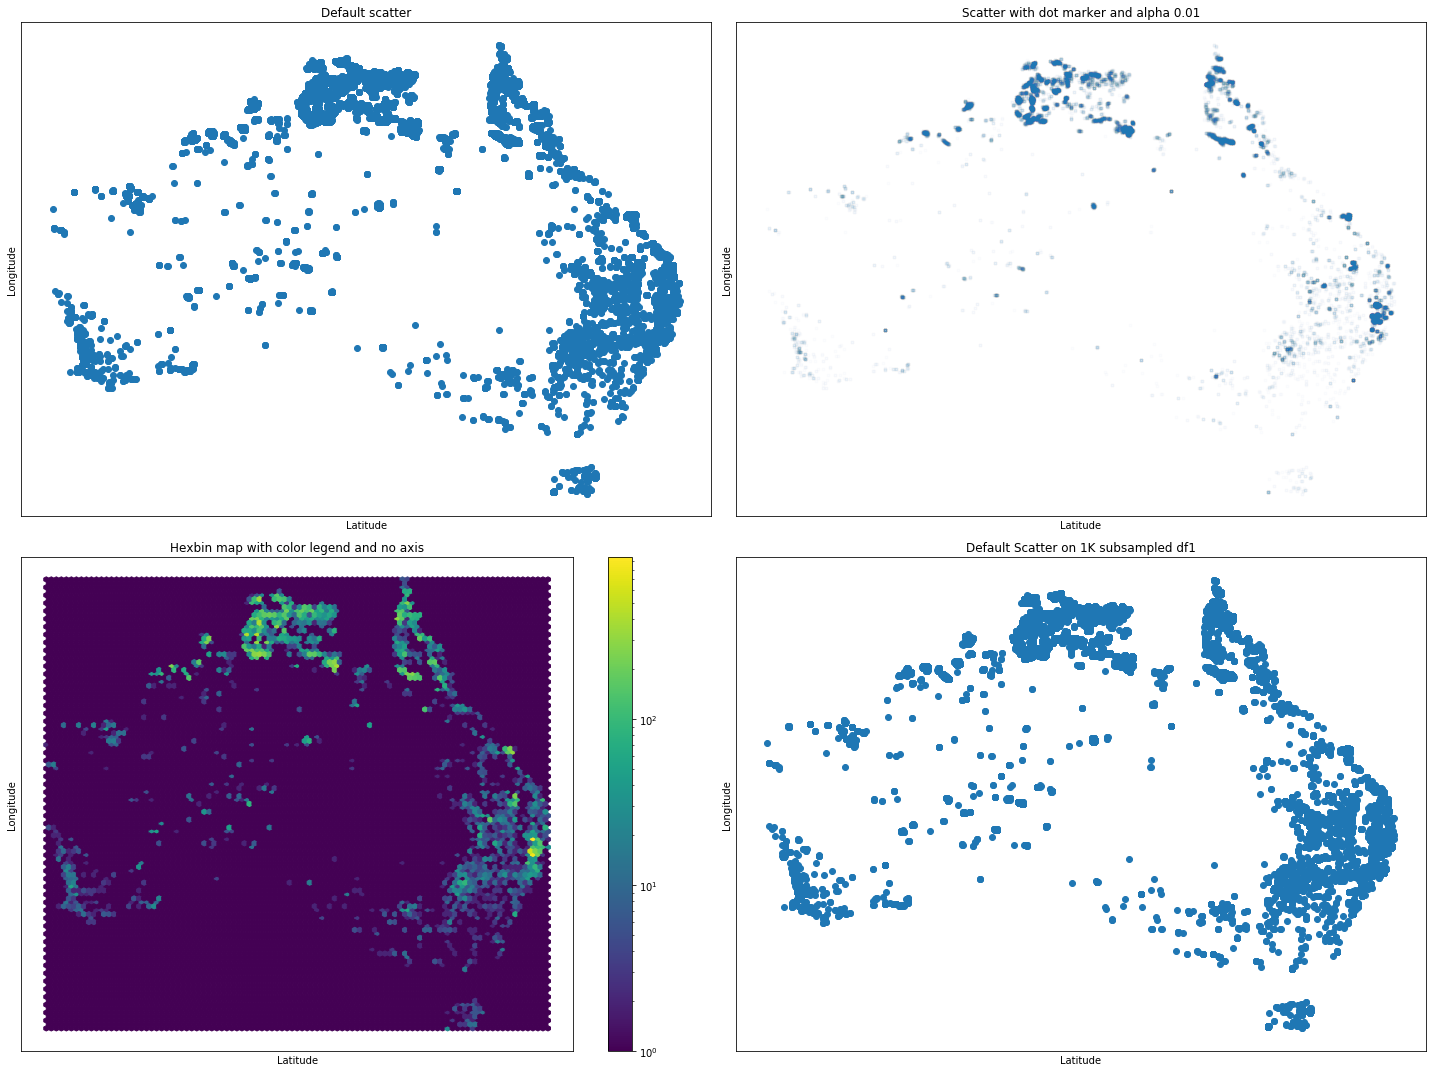

In [48]:
fig, axes = plt.subplots(2,2, figsize =(20,15), subplot_kw={'xticks': (), 'yticks': ()})
axes[0,0].scatter(df1.longitude,df1.latitude)
axes[0,0].set_title("Default scatter")
axes[0,1].scatter(df1.longitude,df1.latitude, alpha=0.01, marker=".")
axes[0,1].set_title("Scatter with dot marker and alpha 0.01")
img = axes[1,0].hexbin(df1.longitude,df1.latitude, bins='log')
axes[1,0].set_title("Hexbin map with color legend and no axis")
axes[1,1].scatter(df1.longitude,df1.latitude)
axes[1,1].set_title("Default Scatter on 1K subsampled df1")
for ax in axes.ravel():
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
plt.tight_layout()
fig.colorbar(img, ax=axes[1,0])
plt.show()